In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
majorLocator   = MultipleLocator(50)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(1)

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\"

In [30]:
load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\'
peakLoad = pd.read_excel(load_folder + 'Peakload.xlsx')
load = pd.read_excel(load_folder + 'load.xlsx')
load = load.sort_values(by=['building id'])
load = load.reset_index()
load = load[['building id', 'Load']]
load

,building id,Load
0,1,58015.584978
1,2,41411.346548
2,3,36953.435376
3,4,31673.736508
4,5,59150.390389
...,...,...
395,396,23415.204886
396,397,24918.728631
397,398,7854.976581
398,399,28841.437895


In [31]:
rate = 'Fixed_Rate'
size = 'Opt_Size'

In [32]:
# HP Operations:
hp_noTES = pd.read_excel(ResultsFolder + 'hp_output_noTES_' + rate +'.xlsx')
hp_MgSO4 = pd.read_excel(ResultsFolder + 'hp_output_salt_' + rate + '_' + size + '_MgSO4'+'.xlsx')
hp_MgCl2 = pd.read_excel(ResultsFolder + 'hp_output_salt_' + rate + '_' + size + '_MgCl2'+'.xlsx')
hp_K2CO3 = pd.read_excel(ResultsFolder + 'hp_output_salt_' + rate + '_' + size + '_K2CO3'+'.xlsx')
hp_SrBr2 = pd.read_excel(ResultsFolder + 'hp_output_salt_' + rate + '_' + size + '_SrBr2'+'.xlsx')

# Clean up:
hp_noTES = hp_noTES.sort_values(by=['building id'])
hp_noTES = hp_noTES.reset_index()
hp_noTES = hp_noTES[['building id', 'HP to load', 'HP total']]

hp_MgSO4 = hp_MgSO4.sort_values(by=['building id'])
hp_MgSO4 = hp_MgSO4.reset_index()
hp_MgSO4 = hp_MgSO4[['building id', 'HP to load', 'HP to TES', 'HP total']]

hp_MgCl2 = hp_MgCl2.sort_values(by=['building id'])
hp_MgCl2 = hp_MgCl2.reset_index()
hp_MgCl2 = hp_MgCl2[['building id', 'HP to load', 'HP to TES', 'HP total']]

hp_K2CO3 = hp_K2CO3.sort_values(by=['building id'])
hp_K2CO3 = hp_K2CO3.reset_index()
hp_K2CO3 = hp_K2CO3[['building id', 'HP to load', 'HP to TES', 'HP total']]

hp_SrBr2 = hp_SrBr2.sort_values(by=['building id'])
hp_SrBr2 = hp_SrBr2.reset_index()
hp_SrBr2 = hp_SrBr2[['building id', 'HP to load', 'HP to TES', 'HP total']]

# Find changes in total costs:
hp_impacts_TES = pd.DataFrame()
hp_impacts_TES['building id'] = hp_noTES['building id']
hp_impacts_TES['Load'] = load['Load']
hp_impacts_TES['ASHP to load - no TES'] = hp_noTES['HP to load']
hp_impacts_TES['ASHP to load - MgSO4'] = hp_MgSO4['HP to load']
hp_impacts_TES['ASHP to load - MgCl2'] = hp_MgCl2['HP to load']
hp_impacts_TES['ASHP to load - K2CO3'] = hp_K2CO3['HP to load']
hp_impacts_TES['ASHP to load - SrBr2'] = hp_SrBr2['HP to load']

hp_impacts_TES

,building id,Load,ASHP to load - no TES,ASHP to load - MgSO4,ASHP to load - MgCl2,ASHP to load - K2CO3,ASHP to load - SrBr2
0,1,58015.584978,58015.584978,45067.457862,46182.849754,51008.525934,51121.606674
1,2,41411.346548,41411.346548,31821.003823,32641.182018,36222.598174,36307.526540
2,3,36953.435376,36953.435376,28029.832169,28777.693623,32069.160146,32151.352551
3,4,31673.736508,31673.736508,23854.867852,24483.517259,27342.185172,27418.357938
4,5,59150.390389,59150.390389,46159.512924,47321.972165,52215.194523,52332.111242
...,...,...,...,...,...,...,...
395,396,23415.204886,23415.204886,18036.817052,18496.130701,20550.193628,20594.944393
396,397,24918.728631,24918.728631,19563.100997,20026.182064,22053.883795,22092.857392
397,398,7854.976581,7854.976581,5982.132420,6131.512849,6820.126827,6842.035687
398,399,28841.437895,28841.437895,22282.815539,22851.396501,25329.719728,25394.658115


In [33]:
# TES Operation:
tes_MgSO4 = pd.read_excel(ResultsFolder + 'tes_discharge_salt_' + rate + '_' + size + '_MgSO4'+'.xlsx')
tes_MgCl2 = pd.read_excel(ResultsFolder + 'tes_discharge_salt_' + rate + '_' + size + '_MgCl2'+'.xlsx')
tes_K2CO3 = pd.read_excel(ResultsFolder + 'tes_discharge_salt_' + rate + '_' + size + '_K2CO3'+'.xlsx')
tes_SrBr2 = pd.read_excel(ResultsFolder + 'tes_discharge_salt_' + rate + '_' + size + '_SrBr2'+'.xlsx')

# Clean up:
tes_MgSO4 = tes_MgSO4.sort_values(by=['building id'])
tes_MgSO4 = tes_MgSO4.reset_index()
tes_MgSO4 = tes_MgSO4[['building id', 'TES discharge', 'TES SOC']]

tes_MgCl2 = tes_MgCl2.sort_values(by=['building id'])
tes_MgCl2 = tes_MgCl2.reset_index()
tes_MgCl2 = tes_MgCl2[['building id', 'TES discharge', 'TES SOC']]

tes_K2CO3 = tes_K2CO3.sort_values(by=['building id'])
tes_K2CO3 = tes_K2CO3.reset_index()
tes_K2CO3 = tes_K2CO3[['building id', 'TES discharge', 'TES SOC']]

tes_SrBr2 = tes_SrBr2.sort_values(by=['building id'])
tes_SrBr2 = tes_SrBr2.reset_index()
tes_SrBr2 = tes_SrBr2[['building id', 'TES discharge', 'TES SOC']]

# Find changes in total costs:
hp_impacts_TES['MgSO4-based TES discharge'] = tes_MgSO4['TES discharge']
hp_impacts_TES['MgCl2-based TES discharge'] = tes_MgCl2['TES discharge']
hp_impacts_TES['K2CO3-based TES discharge'] = tes_K2CO3['TES discharge']
hp_impacts_TES['SrBr2-based TES discharge'] = tes_SrBr2['TES discharge']
hp_impacts_TES

,building id,Load,ASHP to load - no TES,ASHP to load - MgSO4,ASHP to load - MgCl2,ASHP to load - K2CO3,ASHP to load - SrBr2,MgSO4-based TES discharge,MgCl2-based TES discharge,K2CO3-based TES discharge,SrBr2-based TES discharge
0,1,58015.584978,58015.584978,45067.457862,46182.849754,51008.525934,51121.606674,12948.127116,11832.735223,7007.059044,6893.978303
1,2,41411.346548,41411.346548,31821.003823,32641.182018,36222.598174,36307.526540,9590.342725,8770.164530,5188.748374,5103.820008
2,3,36953.435376,36953.435376,28029.832169,28777.693623,32069.160146,32151.352551,8923.603207,8175.741753,4884.275230,4802.082825
3,4,31673.736508,31673.736508,23854.867852,24483.517259,27342.185172,27418.357938,7818.868656,7190.219249,4331.551337,4255.378570
4,5,59150.390389,59150.390389,46159.512924,47321.972165,52215.194523,52332.111242,12990.877465,11828.418223,6935.195866,6818.279147
...,...,...,...,...,...,...,...,...,...,...,...
395,396,23415.204886,23415.204886,18036.817052,18496.130701,20550.193628,20594.944393,5378.387833,4919.074184,2865.011258,2820.260493
396,397,24918.728631,24918.728631,19563.100997,20026.182064,22053.883795,22092.857392,5355.627634,4892.546567,2864.844837,2825.871239
397,398,7854.976581,7854.976581,5982.132420,6131.512849,6820.126827,6842.035687,1872.844162,1723.463732,1034.849754,1012.940894
398,399,28841.437895,28841.437895,22282.815539,22851.396501,25329.719728,25394.658115,6558.622356,5990.041395,3511.718168,3446.779781


In [6]:
hp_impacts_TES.sum()/1000

building id                    80.200000
Load                         9653.346863
ASHP to load - no TES        9653.346863
ASHP to load - MgSO4         7384.195459
ASHP to load - MgCl2         7575.213888
ASHP to load - K2CO3         8424.424779
ASHP to load - SrBr2         8445.371673
MgSO4-based TES discharge    2269.151404
MgCl2-based TES discharge    2078.132975
K2CO3-based TES discharge    1228.922084
SrBr2-based TES discharge    1207.975191
dtype: float64

In [23]:
# Graph TES discharge as a part of total load - MgSO4
hp_impacts_TES['TES %'] = hp_impacts_TES['MgSO4-based TES discharge']/(hp_impacts_TES['MgSO4-based TES discharge']+hp_impacts_TES['ASHP to load - MgSO4'])*100
tes_impacts_MgSO4 = hp_impacts_TES.sort_values(by='Load')
tes_impacts_MgSO4['ASHP to load'] = tes_impacts_MgSO4['ASHP to load - MgSO4']
tes_impacts_MgSO4 = tes_impacts_MgSO4[['building id', 'MgSO4-based TES discharge','ASHP to load']]/1000
tes_impacts_MgSO4['building id'] = tes_impacts_MgSO4['building id']*1000
tes_impacts_MgSO4

,building id,MgSO4-based TES discharge,ASHP to load
304,305.0,1.144930,3.349622
233,234.0,1.377639,3.426943
210,211.0,1.476998,3.652932
338,339.0,1.535484,4.131089
364,365.0,1.849775,4.919440
...,...,...,...
133,134.0,12.208536,45.465064
399,400.0,12.825735,45.093698
0,1.0,12.948127,45.067458
4,5.0,12.990877,46.159513


29.818660479359043 18.59227753080451 23.919973988834204 23.50636972135581


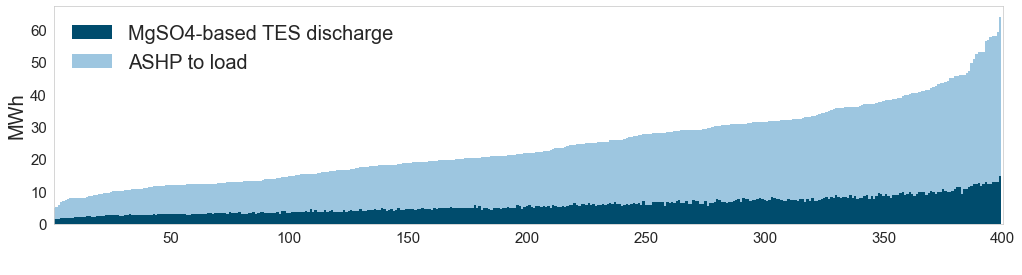

In [24]:
fig, ax = plt.subplots(figsize=(17,4))
tes_impacts_MgSO4.plot(x='building id', kind='bar', stacked=True, width=1, color=["#004c6d", "#9dc6e0"], edgecolor = "none", rot=0, ax=ax)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.grid(False)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
plt.ylabel("MWh", fontsize=20)
plt.xlabel(" ", fontsize=20)
plt.legend(fontsize=20, frameon=False)
plt.xlim(tes_impacts_MgSO4['building id'].min(),tes_impacts_MgSO4['building id'].max())
if size == 'Opt_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_MgSO4_opt.png', dpi=300,bbox_inches='tight')
elif size == 'Var_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_MgSO4.png', dpi=300,bbox_inches='tight')
else:
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_MgSO4_fixed.png', dpi=300,bbox_inches='tight')

print(hp_impacts_TES['TES %'].max(), hp_impacts_TES['TES %'].min(), hp_impacts_TES['TES %'].mean(), hp_impacts_TES['MgSO4-based TES discharge'].sum()/(hp_impacts_TES['MgSO4-based TES discharge'].sum()+hp_impacts_TES['ASHP to load - MgSO4'].sum())*100)


27.471362574733067 17.06225930585716 21.93012749229344 21.527590423596273


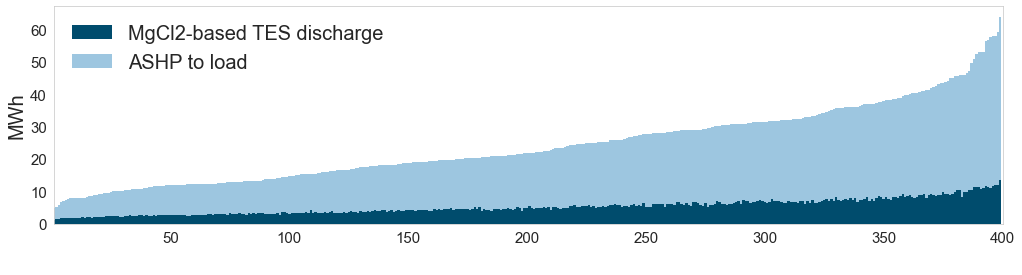

In [25]:
# Graph TES discharge as a part of total load - MgCl2
hp_impacts_TES['TES %'] = hp_impacts_TES['MgCl2-based TES discharge']/(hp_impacts_TES['MgCl2-based TES discharge']+hp_impacts_TES['ASHP to load - MgCl2'])*100
tes_impacts_MgCl2 = hp_impacts_TES.sort_values(by='Load')
tes_impacts_MgCl2['ASHP to load'] = tes_impacts_MgCl2['ASHP to load - MgCl2']
tes_impacts_MgCl2 = tes_impacts_MgCl2[['building id', 'MgCl2-based TES discharge','ASHP to load']]/1000
tes_impacts_MgCl2['building id'] = tes_impacts_MgCl2['building id']*1000
tes_impacts_MgCl2

fig, ax = plt.subplots(figsize=(17,4))
tes_impacts_MgCl2.plot(x='building id', kind='bar', stacked=True, width= 1, color=["#004c6d", "#9dc6e0"], edgecolor = "none", rot=0, ax=ax)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.grid(False)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
plt.ylabel("MWh", fontsize=20)
plt.xlabel(" ", fontsize=20)
plt.legend(fontsize=20, frameon=False)
plt.xlim(tes_impacts_MgCl2['building id'].min(),tes_impacts_MgCl2['building id'].max())
if size == 'Opt_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_MgCl2_opt.png', dpi=300,bbox_inches='tight')
elif size == 'Var_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_MgCl2.png', dpi=300,bbox_inches='tight')
else:
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_MgCl2_fixed.png', dpi=300,bbox_inches='tight')

print(hp_impacts_TES['TES %'].max(), hp_impacts_TES['TES %'].min(), hp_impacts_TES['TES %'].mean(), hp_impacts_TES['MgCl2-based TES discharge'].sum()/(hp_impacts_TES['MgCl2-based TES discharge'].sum()+hp_impacts_TES['ASHP to load - MgCl2'].sum())*100)


In [10]:
tes_impacts_MgCl2.min()

building id                  1.000000
MgCl2-based TES discharge    1.057376
ASHP to load                 3.437176
dtype: float64

In [11]:
tes_impacts_MgCl2.max()

building id                  400.000000
MgCl2-based TES discharge     13.556483
ASHP to load                  50.380486
dtype: float64

16.605636918734152 9.833097833459654 12.730528612435954


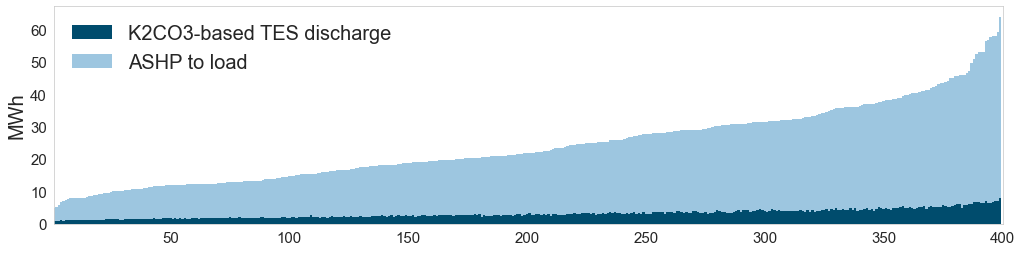

In [26]:
# Graph TES discharge as a part of total load - K2CO3
hp_impacts_TES['TES %'] = hp_impacts_TES['K2CO3-based TES discharge']/(hp_impacts_TES['K2CO3-based TES discharge']+hp_impacts_TES['ASHP to load - K2CO3'])*100
tes_impacts_K2CO3 = hp_impacts_TES.sort_values(by='Load')
tes_impacts_K2CO3['ASHP to load'] = tes_impacts_K2CO3['ASHP to load - K2CO3']
tes_impacts_K2CO3 = tes_impacts_K2CO3[['building id', 'K2CO3-based TES discharge','ASHP to load']]/1000
tes_impacts_K2CO3['building id'] = tes_impacts_K2CO3['building id']*1000
tes_impacts_K2CO3

fig, ax = plt.subplots(figsize=(17,4))
tes_impacts_K2CO3.plot(x='building id', kind='bar', stacked=True, width= 1, color=["#004c6d", "#9dc6e0"], edgecolor = "none", rot=0, ax=ax)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.grid(False)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
plt.ylabel("MWh", fontsize=20)
plt.xlabel(" ", fontsize=20)
plt.legend(fontsize=20, frameon=False)
plt.xlim(tes_impacts_K2CO3['building id'].min(),tes_impacts_K2CO3['building id'].max())

if size == 'Opt_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_K2CO3_opt.png', dpi=300,bbox_inches='tight')
elif size == 'Var_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_K2CO3.png', dpi=300,bbox_inches='tight')
else:
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_K2CO3_fixed.png', dpi=300,bbox_inches='tight')

print(hp_impacts_TES['TES %'].max(), hp_impacts_TES['TES %'].min(), hp_impacts_TES['K2CO3-based TES discharge'].sum()/(hp_impacts_TES['K2CO3-based TES discharge'].sum()+hp_impacts_TES['ASHP to load - K2CO3'].sum())*100)

In [13]:
tes_impacts_K2CO3.min()

building id                  1.000000
K2CO3-based TES discharge    0.635775
ASHP to load                 3.858777
dtype: float64

In [14]:
tes_impacts_K2CO3.max()

building id                  400.000000
K2CO3-based TES discharge      8.077363
ASHP to load                  55.859606
dtype: float64

16.298373997665472 9.698274809467337 12.513537611829562


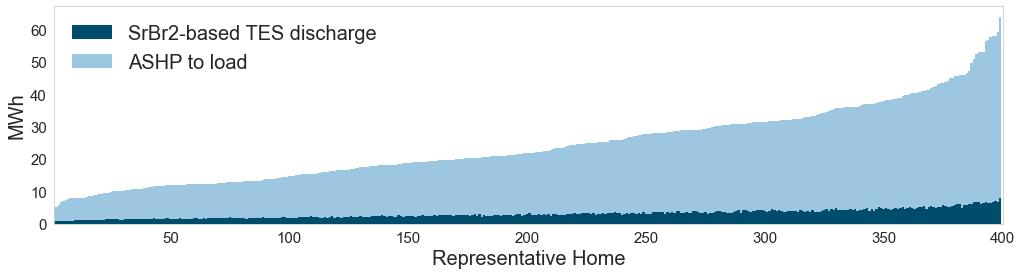

In [15]:
# Graph TES discharge as a part of total load - SrBr2
hp_impacts_TES['TES %'] = hp_impacts_TES['SrBr2-based TES discharge']/(hp_impacts_TES['SrBr2-based TES discharge']+hp_impacts_TES['ASHP to load - SrBr2'])*100
tes_impacts_SrBr2 = hp_impacts_TES.sort_values(by='Load')
tes_impacts_SrBr2['ASHP to load'] = tes_impacts_SrBr2['ASHP to load - SrBr2']
tes_impacts_SrBr2 = tes_impacts_SrBr2[['building id', 'SrBr2-based TES discharge','ASHP to load']]/1000
tes_impacts_SrBr2['building id'] = tes_impacts_SrBr2['building id']*1000
tes_impacts_SrBr2

fig, ax = plt.subplots(figsize=(17,4))
tes_impacts_SrBr2.plot(x='building id', kind='bar', stacked=True, width= 1, color=["#004c6d", "#9dc6e0"], edgecolor = "none", rot=0, ax=ax)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.grid(False)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
plt.ylabel("MWh", fontsize=20)
plt.xlabel("Representative Home", fontsize=20)
plt.legend(fontsize=20, frameon=False)
plt.xlim(tes_impacts_SrBr2['building id'].min(),tes_impacts_SrBr2['building id'].max())

if size == 'Opt_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_SrBr2_opt.png', dpi=300,bbox_inches='tight')
elif size == 'Var_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_SrBr2.png', dpi=300,bbox_inches='tight')
else:
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_SrBr2_fixed.png', dpi=300,bbox_inches='tight')


print(hp_impacts_TES['TES %'].max(), hp_impacts_TES['TES %'].min(), hp_impacts_TES['SrBr2-based TES discharge'].sum()/(hp_impacts_TES['SrBr2-based TES discharge'].sum()+hp_impacts_TES['ASHP to load - SrBr2'].sum())*100)

In [16]:
tes_impacts_SrBr2.min()

building id                  1.000000
SrBr2-based TES discharge    0.622734
ASHP to load                 3.871818
dtype: float64

In [17]:
tes_impacts_SrBr2.max()

building id                  400.000000
SrBr2-based TES discharge      7.944201
ASHP to load                  55.992768
dtype: float64

In [34]:
hp_impacts_TES['peak load'] = peakLoad['Peak Load']
hp_impacts_TES

,building id,Load,ASHP to load - no TES,ASHP to load - MgSO4,ASHP to load - MgCl2,ASHP to load - K2CO3,ASHP to load - SrBr2,MgSO4-based TES discharge,MgCl2-based TES discharge,K2CO3-based TES discharge,SrBr2-based TES discharge,peak load
0,1,58015.584978,58015.584978,45067.457862,46182.849754,51008.525934,51121.606674,12948.127116,11832.735223,7007.059044,6893.978303,27.724174
1,2,41411.346548,41411.346548,31821.003823,32641.182018,36222.598174,36307.526540,9590.342725,8770.164530,5188.748374,5103.820008,20.164945
2,3,36953.435376,36953.435376,28029.832169,28777.693623,32069.160146,32151.352551,8923.603207,8175.741753,4884.275230,4802.082825,18.771555
3,4,31673.736508,31673.736508,23854.867852,24483.517259,27342.185172,27418.357938,7818.868656,7190.219249,4331.551337,4255.378570,16.617412
4,5,59150.390389,59150.390389,46159.512924,47321.972165,52215.194523,52332.111242,12990.877465,11828.418223,6935.195866,6818.279147,27.902137
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,23415.204886,23415.204886,18036.817052,18496.130701,20550.193628,20594.944393,5378.387833,4919.074184,2865.011258,2820.260493,12.189566
396,397,24918.728631,24918.728631,19563.100997,20026.182064,22053.883795,22092.857392,5355.627634,4892.546567,2864.844837,2825.871239,12.662940
397,398,7854.976581,7854.976581,5982.132420,6131.512849,6820.126827,6842.035687,1872.844162,1723.463732,1034.849754,1012.940894,4.833286
398,399,28841.437895,28841.437895,22282.815539,22851.396501,25329.719728,25394.658115,6558.622356,5990.041395,3511.718168,3446.779781,14.577960


In [39]:
ordered_hp_reset = hp_impacts_TES.sort_values(by='peak load')
ordered_hp_reset = ordered_hp_reset.reset_index()
ordered_hp_reset['building'] = ordered_hp_reset.index + 1
ordered_hp_reset

ordered_hp_reset2 = ordered_hp_reset[['building', 'MgSO4-based TES discharge', 'SrBr2-based TES discharge', 'Load']]/1000
ordered_hp_reset2['Heating load'] = ordered_hp_reset2['Load'] - ordered_hp_reset2['MgSO4-based TES discharge']
ordered_hp_reset2['MgSO4-based TES discharge'] = ordered_hp_reset2['MgSO4-based TES discharge'] - ordered_hp_reset2['SrBr2-based TES discharge']
ordered_hp_reset2 = ordered_hp_reset2[['building', 'SrBr2-based TES discharge', 'MgSO4-based TES discharge', 'Heating load']]
ordered_hp_reset2

,building,SrBr2-based TES discharge,MgSO4-based TES discharge,Heating load
0,0.001,0.622734,0.522197,3.349622
1,0.002,0.823054,0.653944,3.652932
2,0.003,0.773836,0.603803,3.426943
3,0.004,0.847431,0.688053,4.131089
4,0.005,0.970073,0.818861,5.228350
...,...,...,...,...
395,0.396,6.392792,5.922742,44.403471
396,0.397,6.893978,6.054149,45.067458
397,0.398,6.818279,6.172598,46.159513
398,0.399,6.664957,6.160778,45.093698


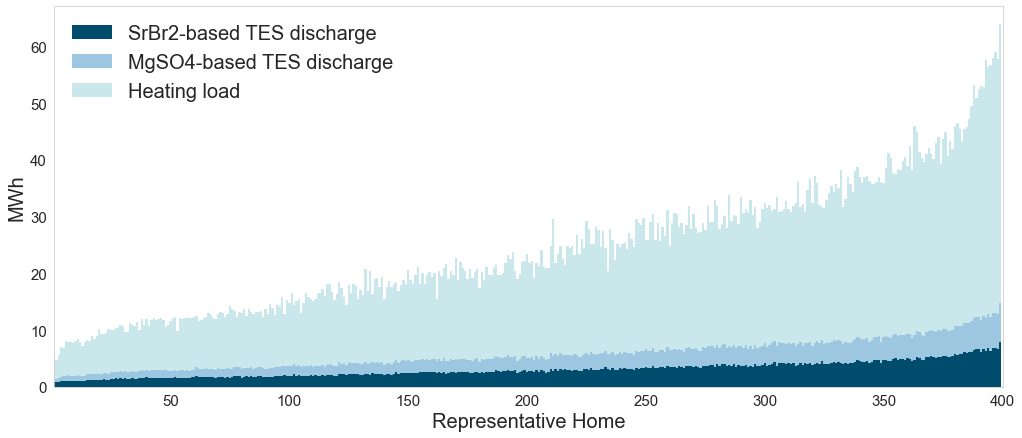

In [43]:
fig, ax = plt.subplots(figsize=(17,7))
ordered_hp_reset2.plot(x='building', kind='bar', stacked=True, width= 1, color=["#004c6d", "#9dc6e0", "#cae8eb"], edgecolor = "none", rot=0, ax=ax)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.grid(False)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
plt.ylabel("MWh", fontsize=20)
plt.xlabel("Representative Home", fontsize=20)
plt.legend(fontsize=20, frameon=False)
plt.xlim(ordered_hp_reset['building'].min(),ordered_hp_reset['building'].max())

if size == 'Opt_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_opt.png', dpi=300,bbox_inches='tight')
elif size == 'Var_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_var.png', dpi=300,bbox_inches='tight')
else:
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_output_fixed.png', dpi=300,bbox_inches='tight')